In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

**Data Initialization**

In [3]:
#Importing datasets mounted on google drive
flights_df = pd.read_csv('/content/drive/MyDrive/dataset/flights.csv', low_memory=False)
airports_df = pd.read_csv('/content/drive/MyDrive/dataset/airports.csv')
airlines_df = pd.read_csv('/content/drive/MyDrive/dataset/airlines.csv')

**Reading and Analyzing Flight Dataset**

In [4]:
#Displaying the dimensions (shape) of the flights DataFrame
print('Dataframe dimensions:', flights_df.shape)

Dataframe dimensions: (1819079, 31)


In [5]:
#Displaying concise summary information about the flights DataFrame
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1819079 entries, 0 to 1819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [6]:
#Generating descriptive statistics for numerical columns in the flights DataFrame
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,1819079.0,1.819079e+06,1.819079e+06,1.819079e+06,1.819079e+06,1.819079e+06,1.791947e+06,1.791947e+06,1.791023e+06,1.791023e+06,...,1.819079e+06,1.789967e+06,1.786050e+06,1.819079e+06,1.819079e+06,332780.000000,332780.000000,332780.000000,332780.000000,332780.000000
mean,2015.0,6.523306e+00,1.569716e+01,3.927207e+00,2.172858e+03,1.329438e+03,1.335111e+03,9.364773e+00,1.607536e+01,1.357097e+03,...,1.493413e+03,1.475996e+03,4.405459e+00,2.590872e-03,1.556612e-02,13.531733,0.076089,18.839419,23.491607,2.887502
std,0.0,3.405617e+00,8.785455e+00,1.989233e+00,1.756430e+03,4.838841e+02,4.965246e+02,3.698568e+01,8.891007e+00,4.980941e+02,...,5.072620e+02,5.265056e+02,3.916590e+01,5.083464e-02,1.237894e-01,28.199144,2.200748,47.369371,43.440204,20.279185
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.310000e+02,9.160000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.058000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.688000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.232000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.000000e+00,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.793000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.000000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1049.000000,573.000000,1971.000000,1331.000000,1116.000000


In [7]:
#Displaying the first few rows of the flights DataFrame
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,UA,1197,N78448,SFO,IAH,48,...,619.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,DL,1670,N806DN,PDX,MSP,50,...,551.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,939.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AA,2211,N3CGAA,PHX,MIA,127,...,710.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Displaying the last few rows of the flights DataFrame
flights_df.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1819074,2015,12,31,4,UA,671,N33209,PDX,IAH,2359,...,545.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1819075,2015,12,31,4,UA,1849,N497UA,LAS,EWR,2359,...,718.0,-24.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1819076,2015,12,31,4,AA,2342,N3DLAA,DEN,MIA,2359,...,525.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1819077,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1819078,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Reading and Analyzing Airport Dataset**

In [9]:
#Checking the dimensions (shape) of the airports DataFrame
airports_df.shape

(322, 7)

In [10]:
#Displaying concise summary information about the airports DataFrame
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [11]:
# Generating descriptive statistics for numerical columns in the airports DataFrame
airports_df.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [12]:
# Displaying the last few rows of the airports DataFrame
airports_df.tail()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


**Reading and Analyzing Airlines Dataset**

In [13]:
# Displaying concise summary information about the airlines DataFrame
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [14]:
#Generating descriptive statistics for numerical columns in the airlines DataFrame
airlines_df.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,UA,United Air Lines Inc.
freq,1,1


In [15]:
# Displaying the first few rows of the airlines DataFrame
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [16]:
#Displaying the last few rows of the airlines DataFrame
airlines_df.tail()

,IATA_CODE,AIRLINE
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
11,HA,Hawaiian Airlines Inc.
12,MQ,American Eagle Airlines Inc.
13,VX,Virgin America


In [17]:
#Checking the dimensions (shape) of the airlines DataFrame
airlines_df.shape

(14, 2)

**Data Cleaning and Feature Engineering**

In [18]:
#Getting overview of all what all needs to be changed
flights_df[:5]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,UA,1197,N78448,SFO,IAH,48,...,619.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,DL,1670,N806DN,PDX,MSP,50,...,551.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,939.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AA,2211,N3CGAA,PHX,MIA,127,...,710.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#In the initial dataframe, dates are coded according to 4 variables: YEAR, MONTH, DAY, and DAY_OF_WEEK.
#In fact, python offers the datetime format which is really convenient to work with dates and times and I thus convert the dates in this format:
flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR','MONTH', 'DAY']])

In [20]:
flights_df[:5]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,UA,1197,N78448,SFO,IAH,48,...,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,DL,1670,N806DN,PDX,MSP,50,...,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,100,...,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AA,2211,N3CGAA,PHX,MIA,127,...,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [21]:
#SCHEDULED_DEPARTURE variable, the hour of the take-off is coded as a float where the two first digits indicate the hour and the two last, the minutes.
#This format is not convenient and I thus convert it.
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_time_string(time_str):
    if pd.isnull(time_str):
        return np.nan
    else:
        if time_str == 2400:
            time_str = 0
        time_str = "{0:04d}".format(int(time_str))
        time = datetime.time(int(time_str[0:2]), int(time_str[2:4]))
        return time

def combine_date_time(date_time):
    if pd.isnull(date_time[0]) or pd.isnull(date_time[1]):
        return np.nan
    else:
        return datetime.datetime.combine(date_time[0], date_time[1])

def create_flight_schedule(data_frame, column):
    schedule_list = []
    for index, cols in data_frame[['DATE', column]].iterrows():
        if pd.isnull(cols[1]):
            schedule_list.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            schedule_list.append(combine_date_time(cols))
        else:
            cols[1] = format_time_string(cols[1])
            schedule_list.append(combine_date_time(cols))
    return pd.Series(schedule_list)

In [22]:
#Formatting SCHEDULED_DEPARTURE, DEPARTURE_TIME, SCHEDULED_ARRIVAL, ARRIVAL_TIME to a standard date time format
flights_df['SCHEDULED_DEPARTURE'] = create_flight_schedule(flights_df, 'SCHEDULED_DEPARTURE')
flights_df['DEPARTURE_TIME'] = flights_df['DEPARTURE_TIME'].apply(format_time_string)
flights_df['SCHEDULED_ARRIVAL'] = flights_df['SCHEDULED_ARRIVAL'].apply(format_time_string)
flights_df['ARRIVAL_TIME'] = flights_df['ARRIVAL_TIME'].apply(format_time_string)
flights_df['WHEELS_OFF'] = flights_df['WHEELS_OFF'].apply(format_time_string)
flights_df['WHEELS_ON'] = flights_df['WHEELS_ON'].apply(format_time_string)
#__________________________________________________________________________
flights_df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY','WHEELS_OFF','WHEELS_ON']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY,WHEELS_OFF,WHEELS_ON
0,2015-01-01 00:30:00,07:11:00,00:33:00,06:56:00,3.0,-15.0,00:45:00,06:51:00
1,2015-01-01 00:48:00,06:26:00,00:42:00,06:19:00,-6.0,-7.0,00:53:00,06:12:00
2,2015-01-01 00:50:00,06:03:00,00:45:00,05:51:00,-5.0,-12.0,00:54:00,05:45:00
3,2015-01-01 01:00:00,09:38:00,00:52:00,09:39:00,-8.0,1.0,01:22:00,09:33:00
4,2015-01-01 01:27:00,07:26:00,01:16:00,07:10:00,-11.0,-16.0,01:26:00,07:03:00
5,2015-01-01 01:35:00,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Checking for missing values in the flights DataFrame
flights_df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               4666
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           27132
DEPARTURE_DELAY          27132
TAXI_OUT                 28056
WHEELS_OFF               28056
SCHEDULED_TIME               5
ELAPSED_TIME             33029
AIR_TIME                 33029
DISTANCE                     0
WHEELS_ON                29112
TAXI_IN                  29112
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             29112
ARRIVAL_DELAY            33029
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1790763
AIR_SYSTEM_DELAY       1486299
SECURITY_DELAY         1486299
AIRLINE_DELAY          1486299
LATE_AIRCRAFT_DELAY    1486299
WEATHER_DELAY          1486299
DATE                         0
dtype: i

In [24]:
# Handling missing values in delay-related columns by replacing NaN values with zeros
flights_df['AIRLINE_DELAY'] = flights_df['AIRLINE_DELAY'].fillna(0)
flights_df['AIR_SYSTEM_DELAY'] = flights_df['AIR_SYSTEM_DELAY'].fillna(0)
flights_df['SECURITY_DELAY'] = flights_df['SECURITY_DELAY'].fillna(0)
flights_df['LATE_AIRCRAFT_DELAY'] = flights_df['LATE_AIRCRAFT_DELAY'].fillna(0)
flights_df['WEATHER_DELAY'] = flights_df['WEATHER_DELAY'].fillna(0)

In [25]:
#CANCELLATION_REASON is a categorical variables wherein
#A - Airline/Carrier
#B - Weather
#C - National Air System
#D - Security
flights_df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    15310
A     8011
C     4989
D        6
Name: count, dtype: int64

*Weather is the main reason for cancellation of flights*

In [26]:
# Mapping cancellation reasons to numeric values
flights_df.loc[flights_df['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
flights_df.loc[flights_df['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
flights_df.loc[flights_df['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
flights_df.loc[flights_df['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

In [27]:
# Converting NaN data to numeric zero
flights_df['CANCELLATION_REASON'] = flights_df['CANCELLATION_REASON'].fillna(0)

In [28]:
# Dropping rows with missing values from the flights DataFrame
flights_df = flights_df.dropna(axis=0)
flights_df.reset_index(drop=True, inplace=True)

In [29]:
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,DL,1173,N826DN,LAS,ATL,2015-01-01 00:30:00,...,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
1,2015,1,1,4,UA,1197,N78448,SFO,IAH,2015-01-01 00:48:00,...,-7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
2,2015,1,1,4,DL,1670,N806DN,PDX,MSP,2015-01-01 00:50:00,...,-12.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
3,2015,1,1,4,AA,371,N3GXAA,SEA,MIA,2015-01-01 01:00:00,...,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
4,2015,1,1,4,AA,2211,N3CGAA,PHX,MIA,2015-01-01 01:27:00,...,-16.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786045,2015,12,31,4,UA,671,N33209,PDX,IAH,2015-12-31 23:59:00,...,-19.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786046,2015,12,31,4,UA,1849,N497UA,LAS,EWR,2015-12-31 23:59:00,...,-24.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786047,2015,12,31,4,AA,2342,N3DLAA,DEN,MIA,2015-12-31 23:59:00,...,-18.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786048,2015,12,31,4,B6,688,N657JB,LAX,BOS,2015-12-31 23:59:00,...,-26.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31


In [30]:
#Removing unnecessary columns
columns_to_drop = ['YEAR', 'MONTH', 'DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']
flights_df = flights_df.drop(columns=columns_to_drop)

In [31]:
# Convert the 'WHEELS_ON' column to string data type.
flights_df['WHEELS_ON'] = flights_df['WHEELS_ON'].astype(str)
flights_df['WHEELS_OFF'] = flights_df['WHEELS_OFF'].astype(str)

In [32]:
#Convert a time string in the format 'hours:minutes:seconds' to minutes.
#Total minutes represented by the time string.
#If the input time string is not in the correct format, the function returns -1
def time_to_minutes(time_str):
    try:
        hours, minutes, seconds = time_str.split(':')
    except ValueError:
        return -1
    return int(hours)*60 + int(minutes) + int(seconds)/60.0

In [33]:
# Converts each time value in the 'WHEELS_OFF' column from the format 'hours:minutes:seconds' to the total number of minutes
flights_df['WHEELS_OFF'] = flights_df['WHEELS_OFF'].apply(time_to_minutes)

In [34]:
# Converts each time value in the 'WHEELS_ON' column from the format 'hours:minutes:seconds' to the total number of minutes
flights_df['WHEELS_ON'] = flights_df['WHEELS_ON'].apply(time_to_minutes)

In [35]:
#Displaying data frame
flights_df[['WHEELS_OFF','WHEELS_ON']]

,WHEELS_OFF,WHEELS_ON
0,45.0,411.0
1,53.0,372.0
2,54.0,345.0
3,82.0,573.0
4,86.0,423.0
...,...,...
1786045,2.0,336.0
1786046,12.0,423.0
1786047,9.0,319.0
1786048,17.0,469.0


In [36]:
flights_df

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,DL,1173,LAS,ATL,3.0,12.0,45.0,221.0,203.0,186.0,...,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
1,UA,1197,SFO,IAH,-6.0,11.0,53.0,218.0,217.0,199.0,...,-7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
2,DL,1670,PDX,MSP,-5.0,9.0,54.0,193.0,186.0,171.0,...,-12.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
3,AA,371,SEA,MIA,-8.0,30.0,82.0,338.0,347.0,311.0,...,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
4,AA,2211,PHX,MIA,-11.0,10.0,86.0,239.0,234.0,217.0,...,-16.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786045,UA,671,PDX,IAH,-7.0,10.0,2.0,245.0,233.0,214.0,...,-19.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786046,UA,1849,LAS,EWR,-2.0,15.0,12.0,283.0,261.0,231.0,...,-24.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786047,AA,2342,DEN,MIA,-8.0,18.0,9.0,224.0,214.0,190.0,...,-18.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31
1786048,B6,688,LAX,BOS,-4.0,22.0,17.0,320.0,298.0,272.0,...,-26.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-12-31


In [37]:
#Flight Dataset is cleaned and we will be using this cleaned dataset when training our models
flights_df.to_csv(r'/content/drive/MyDrive/dataset/flights_cleaned.csv', index=False)

In [38]:
#Displaying airports_df
airports_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [39]:
#Dropping latitude and longitude columns as no longer needed
airports_df.drop(columns=['LATITUDE', 'LONGITUDE'], inplace=True)

In [40]:
#Check for NaN values in the DataFrame
airports_df.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
dtype: int64

In [41]:
#Displaying first 10 records
airports_df.head(10)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA
6,ACT,Waco Regional Airport,Waco,TX,USA
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA
9,ADK,Adak Airport,Adak,AK,USA


**Exploratory Data Analysis**

In [42]:
# Check the countries in the Airport data
countries = airports_df['COUNTRY'].value_counts().index
print("The airport data has total of {} countries".format(len(countries)))

The airport data has total of 1 countries


In [43]:
# WE HAVE ONLY ONE COUNTRY's DATA i.e USA
airports_df['COUNTRY'].value_counts().index

Index(['USA'], dtype='object', name='COUNTRY')

<ipython-input-44-025533fe5b50>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


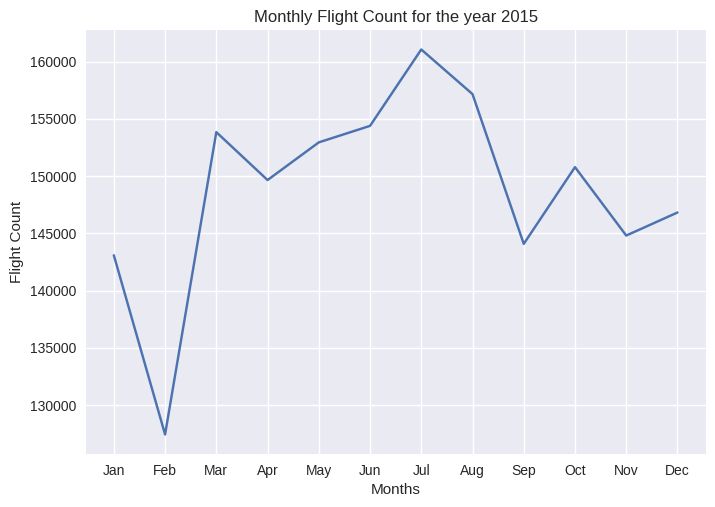

In [44]:
#Extracting month from date column
flights_df['MONTH'] = flights_df['DATE'].dt.month
# Plot the monthly data
plt.style.use('seaborn')
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
flight_counts = flights_df.groupby('MONTH').count()['FLIGHT_NUMBER'].plot()
plt.xlabel("Months")
plt.xticks(labels=months_labels, ticks=np.arange(1,13,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count for the year 2015")
plt.show()

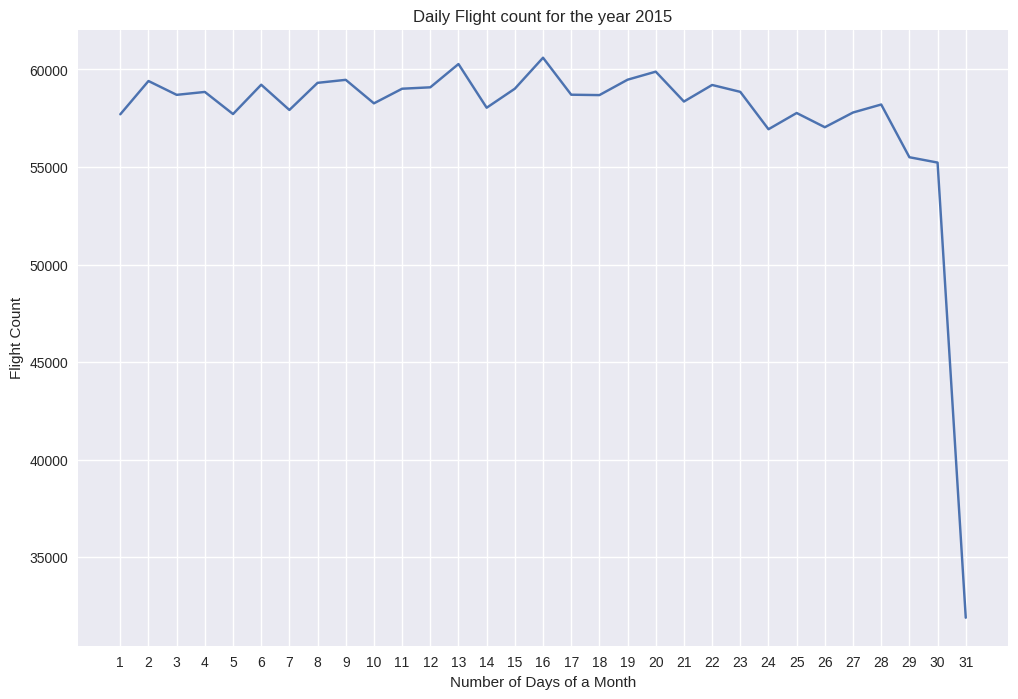

In [45]:
# Extracting day from Date
flights_df['DAY'] = flights_df['DATE'].dt.day
# Plot the daily flight data for the year 2015
flights_df.groupby('DAY').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Number of Days of a Month")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Flight Count")
plt.title("Daily Flight count for the year 2015")
plt.show()

*Number of flights are less on 31st because not every month has 31 days. Data for all other days is fairly constant.*

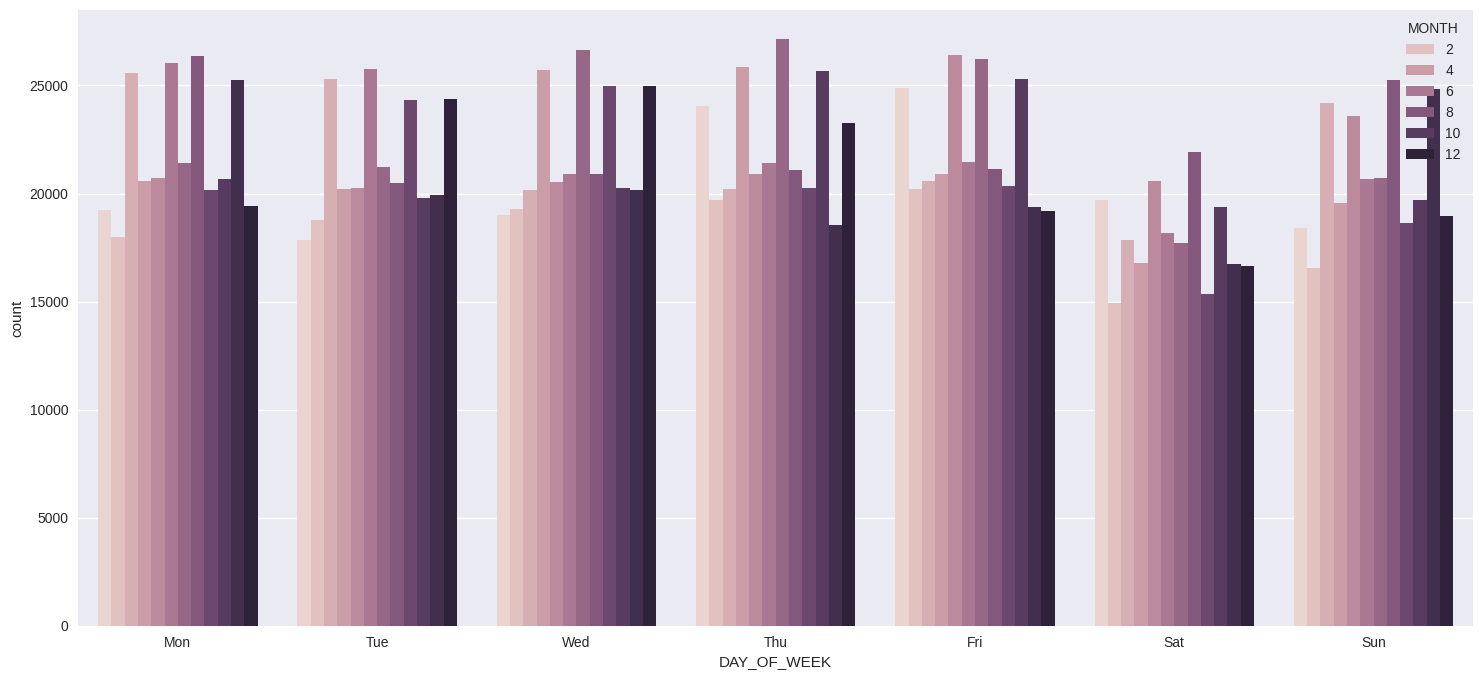

In [46]:
# Extracting day of week from Date column
flights_df['DAY_OF_WEEK'] = flights_df['DATE'].dt.dayofweek
# Plot the distribution of flights across DAY_OF_WEEK for each Month
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  # corrected typo in day_labels
plt.figure(figsize=(18, 8))
sns.countplot(data=flights_df, x='DAY_OF_WEEK', hue='MONTH')
plt.xticks(labels=day_labels, ticks=np.arange(0, 7, 1))
plt.show()


*Equal representation of all the days of the week across every month.*

In [47]:
# Merge the flights DataFrame with the airlines DataFrame based on the 'AIRLINE' column in flights_df
# and the 'IATA_CODE' column in airlines_df, keeping only matching records ('inner' join).
flights_df = flights_df.merge(airlines_df, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

# Drop the 'AIRLINE_x' and 'IATA_CODE' columns from the flights DataFrame
flights_df = flights_df.drop(['AIRLINE_x','IATA_CODE'], axis=1)

# Rename the 'AIRLINE_y' column to 'AIRLINE' in the flights DataFrame
flights_df = flights_df.rename(columns={"AIRLINE_y":"AIRLINE"})

# Merge the flights DataFrame with the airports DataFrame based on the 'ORIGIN_AIRPORT' column in flights_df
# and the 'IATA_CODE' column in airports_df, keeping only matching records ('inner' join).
flights_df = flights_df.merge(airports_df, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')

# Merge the flights DataFrame with the airports DataFrame based on the 'DESTINATION_AIRPORT' column in flights_df
# and the 'IATA_CODE' column in airports_df, keeping only matching records ('inner' join).
flights_df = flights_df.merge(airports_df, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

# Retrieve and print the column names of the flights DataFrame.
flights_df.columns

Index(['FLIGHT_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE', 'MONTH', 'DAY',
       'DAY_OF_WEEK', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x', 'CITY_x',
       'STATE_x', 'COUNTRY_x', 'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y',
       'COUNTRY_y'],
      dtype='object')

In [48]:
# Drop the columns 'STATE_y', 'COUNTRY_y', 'STATE_x', and 'COUNTRY_x' from the flights DataFrame.
flights_df = flights_df.drop(['STATE_y', 'COUNTRY_y','STATE_x', 'COUNTRY_x'], axis=1)

# Rename columns in the flights DataFrame to provide clearer labels for origin and destination airports.
flights_df = flights_df.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

#Displaying the dataframe to validate everything once
flights_df[:5]

,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,...,MONTH,DAY,DAY_OF_WEEK,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,1173,LAS,ATL,3.0,12.0,45.0,221.0,203.0,186.0,1747,...,1,1,3,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta
1,1067,LAS,ATL,-1.0,12.0,930.0,221.0,206.0,190.0,1747,...,1,1,3,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta
2,1553,LAS,ATL,0.0,15.0,450.0,226.0,224.0,198.0,1747,...,1,2,4,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta
3,2102,LAS,ATL,-1.0,17.0,1411.0,221.0,234.0,209.0,1747,...,1,2,4,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta
4,2203,LAS,ATL,-3.0,16.0,688.0,226.0,223.0,199.0,1747,...,1,3,5,Delta Air Lines Inc.,LAS,McCarran International Airport,Las Vegas,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta


<ipython-input-49-09ec30f7bc98>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")


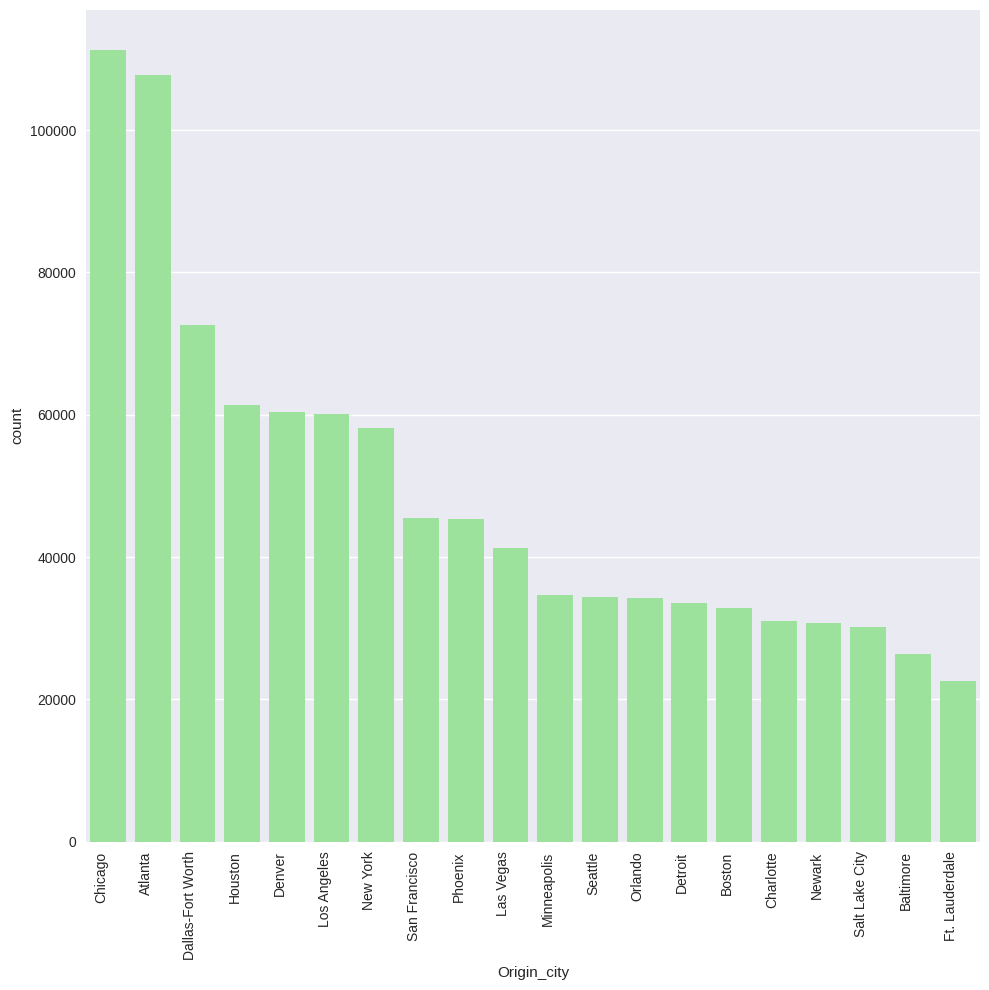

In [49]:
# Create a countplot for the top 20 Origin cities in explore_flights_data
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights_df['Origin_city'], data = flights_df,
              order=flights_df['Origin_city'].value_counts().iloc[:20].index,color='lightgreen')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

*Chicago has the highest count of flights from origin city*

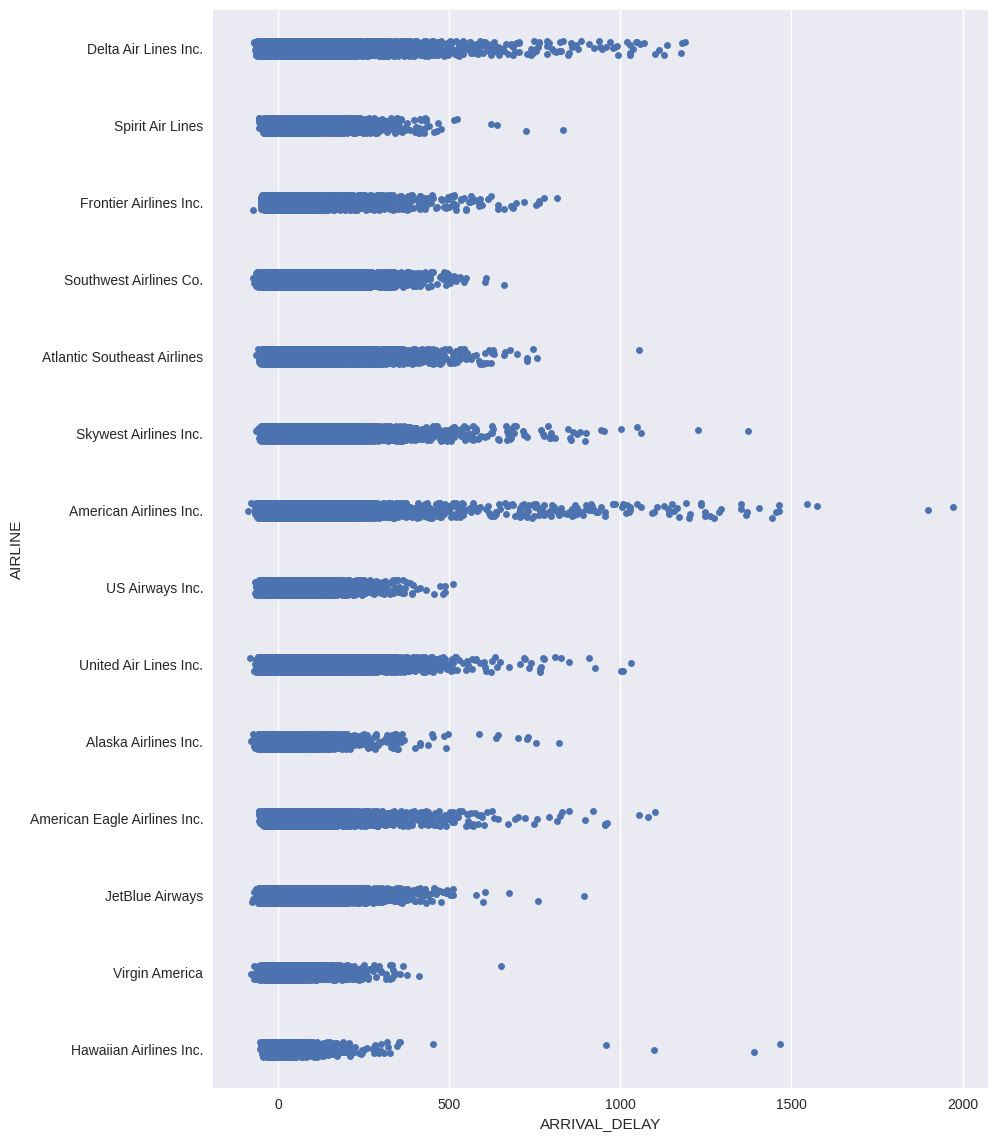

In [50]:
# Create a stripplot to visualize the relationship between 'ARRIVAL_DELAY' and 'AIRLINE
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = flights_df, dodge=True, jitter=True
            )
plt.show()

*American Airlines Inc has the highest Arrival Delay.*

In [51]:
# Print the most flying airline with the total number of fligths in the year 2015
most_flying_airline = flights_df['AIRLINE'].value_counts().index[0]
max_flights = flights_df['AIRLINE'].value_counts().iloc[0]

print("The airlines with most number of flights in the year 2015 is {}".format(most_flying_airline))
print("Maximum flights in the year 2015 are {:,}".format(max_flights))

The airlines with most number of flights in the year 2015 is Southwest Airlines Co.
Maximum flights in the year 2015 are 355,882


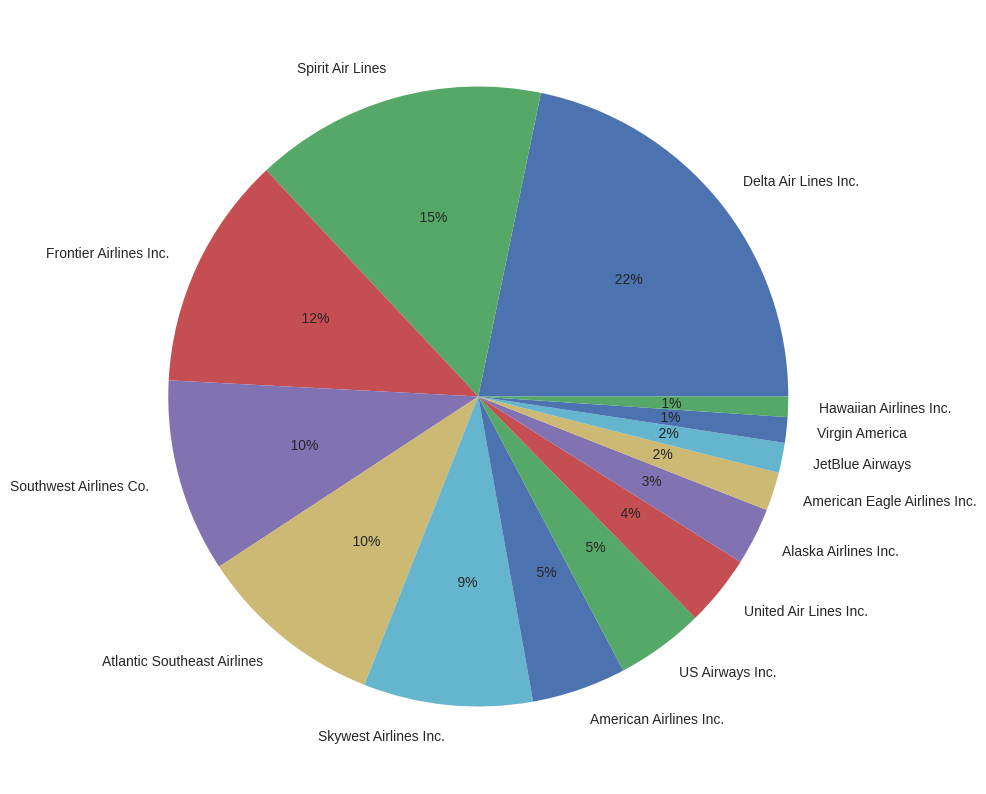

In [52]:
# Calculate the count of flights for each airline
axis = plt.subplots(figsize=(10,14))
# Extract unique airline names from the 'AIRLINE' column
Name = flights_df["AIRLINE"].unique()
# Calculate the count of flights for each airline
size = flights_df["AIRLINE"].value_counts()
# Create a pie chart with counts of flights for each airline
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

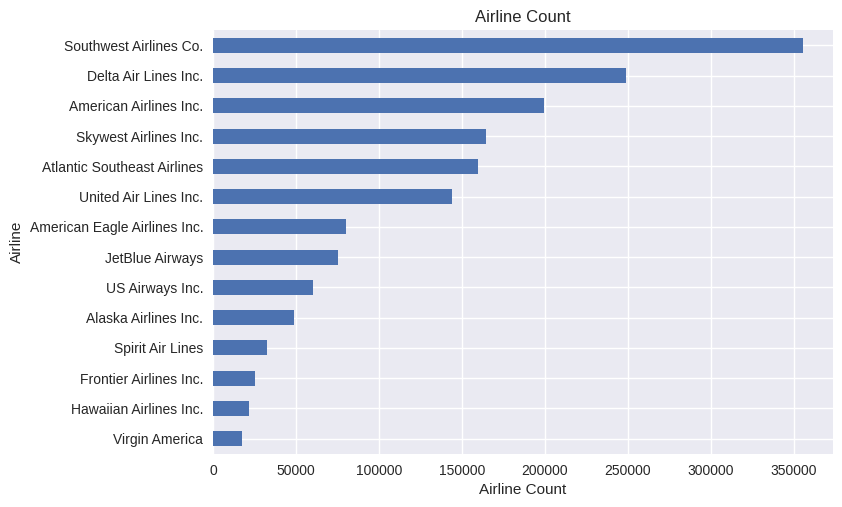

In [53]:
# Plot the AIRLINE count distribution
flights_df['AIRLINE'].value_counts().sort_values().plot(kind='barh')
plt.ylabel("Airline")
plt.xlabel("Airline Count")
plt.title("Airline Count")
plt.show()

*Southwest Airlines has the most number of airline count in 2015*

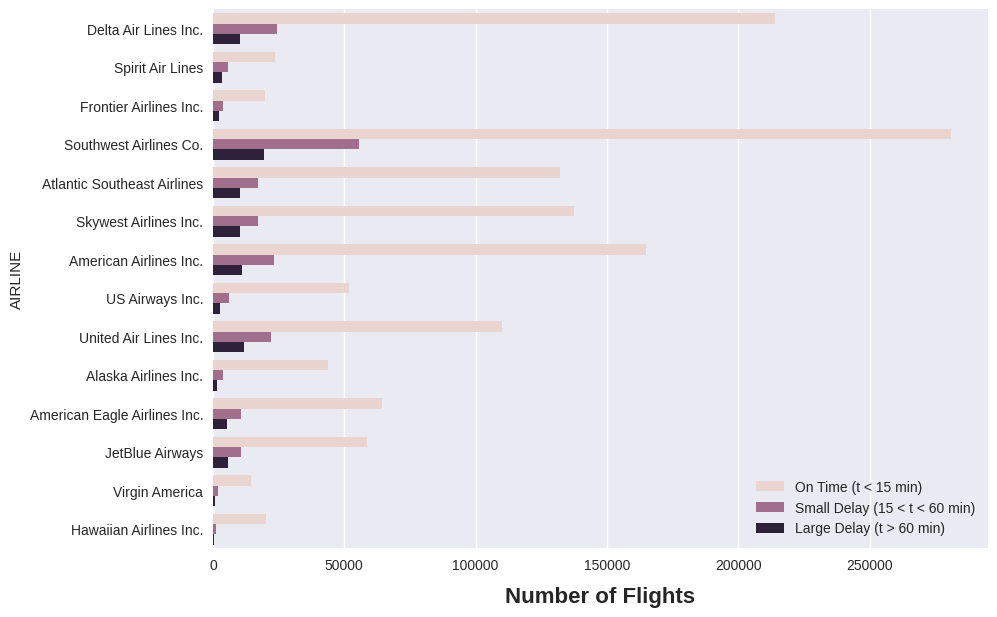

In [54]:
# Define a function to group delays
define_delay_type = lambda x:((0,1)[x > 15],2)[x > 60]
flights_df['DELAY_LEVEL'] = flights_df['DEPARTURE_DELAY'].apply(define_delay_type)

# Plotting
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights_df)

# Set x-axis label
plt.xlabel('Number of Flights', fontsize=16, weight='bold', labelpad=10)

# Set legend
L = plt.legend()
L.get_texts()[0].set_text('On Time (t < 15 min)')
L.get_texts()[1].set_text('Small Delay (15 < t < 60 min)')
L.get_texts()[2].set_text('Large Delay (t > 60 min)')
plt.show()

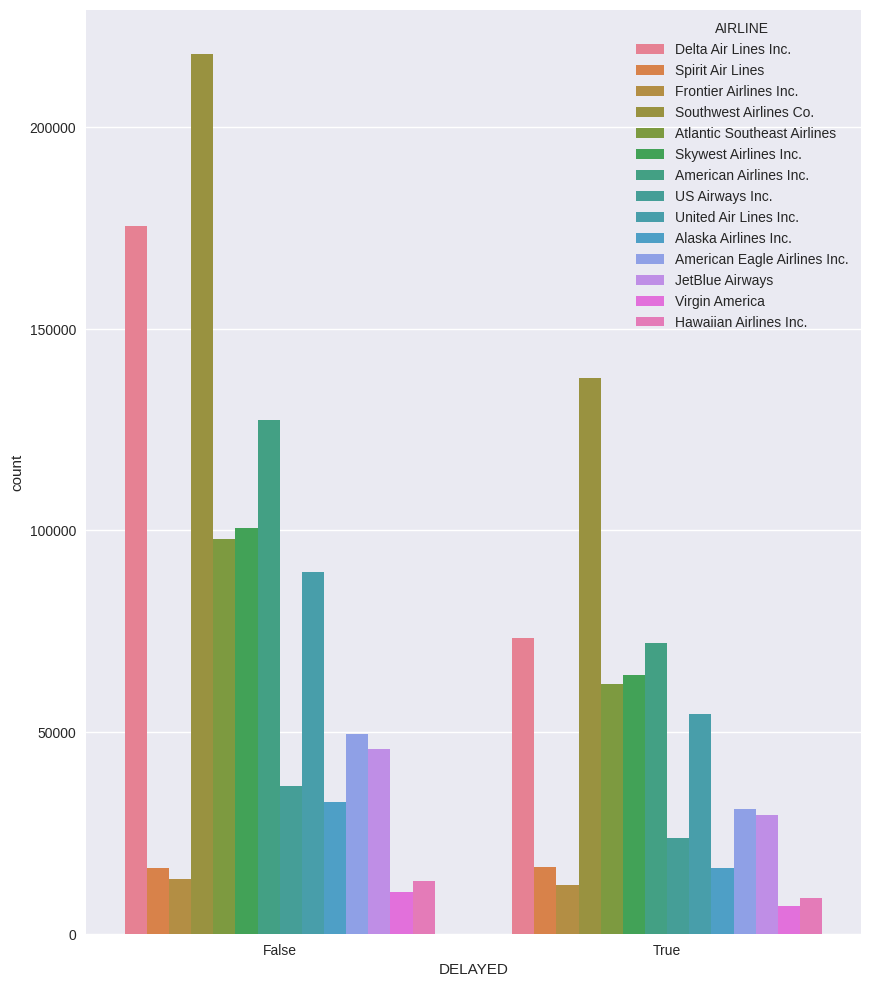

In [55]:
# Marking the delayed flights
flights_df['DELAYED'] = flights_df.loc[:,'ARRIVAL_DELAY'].values > 0

figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='AIRLINE',data=flights_df)
plt.show()

**Machine Learning Models**

In [56]:
#Reading cleaned file dataset
flights_final = pd.read_csv('/content/drive/MyDrive/dataset/flights_cleaned.csv', low_memory=False)

In [57]:
flights_final.head(1)

,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,DL,1173,LAS,ATL,3.0,12.0,45.0,221.0,203.0,186.0,...,-15.0,0,0,0,0.0,0.0,0.0,0.0,0.0,2015-01-01


In [58]:
# Selecting features (X) and target variable (y) from the final preprocessed flight data
# Features (X) include various factors that could affect arrival delay, such as departure delay, taxi-out time, scheduled time, etc.
x = flights_final[['TAXI_OUT','DISTANCE','TAXI_IN',
        'DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
        'LATE_AIRCRAFT_DELAY','WEATHER_DELAY','WHEELS_ON','WHEELS_OFF']]
# Target variable (y) represents the arrival delay, which we want to predict
y = flights_final['ARRIVAL_DELAY']

In [59]:
# Splitting the data into training and testing sets using train_test_split function from scikit-learn
# xtrain and xtest will contain the features (X) for training and testing respectively
# ytrain and ytest will contain the corresponding target variable (y) for training and testing respectively
# test_size=0.3 indicates that 30% of the data will be used for testing, while 70% will be used for training
# random_state=55 sets a seed for reproducibility, ensuring that the split is the same each time the code is run
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=55)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(1250235, 13) (535815, 13)
(1250235,) (535815,)


***Linear Regression Model***

In [60]:
from sklearn import metrics

# Creating an instance of the LinearRegression model
model = LinearRegression()
# Accessing the intercept term of the fitted linear regression model

model.fit(xtrain, ytrain)
# Making predictions on the testing set using the fitted linear regression model

linear_pred = model.predict(xtest)

acc_linear = metrics.r2_score(ytest, linear_pred)
print('R^2:', acc_linear)
print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, linear_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
print('Mean Absolute Error (MAE):',metrics.mean_absolute_error(ytest, linear_pred))
print('Mean Squared Error (MSE):',metrics.mean_squared_error(ytest, linear_pred))
print('Root Mean Squared Error (RMSE):',np.sqrt(metrics.mean_squared_error(ytest,linear_pred)))

# Making predictions on the entire dataset (both training and testing)
prediction = model.predict(x)

model_df = flights_final
# Add the predicted values as a new column to the 'flights_final' DataFrame
model_df['LR_PREDICTION'] = prediction
# Using the head() method to display the first few rows of the column
model_df['LR_PREDICTION'].head()
# Filtering the 'linear_reg' DataFrame to select rows where the predicted values match the 'prediction' array
# This is done using the loc[] method with a boolean condition
# result_df will contain only the rows where 'LR_PREDICTION' matches the values in 'prediction'
result_df = model_df.loc[(model_df['LR_PREDICTION'] == prediction)]

# Selecting specific columns ('AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'LR_PREDICTION') from the filtered DataFrame
# The [0:10] slice is used to display only the first 10 rows of the resulting DataFrame
result_df[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','LR_PREDICTION']][0:10]


R^2: 0.9409625250992408
Adjusted R^2: 0.9409610926883761
Mean Absolute Error (MAE): 7.513535505176018
Mean Squared Error (MSE): 91.87348011387982
Root Mean Squared Error (RMSE): 9.585065472592236


,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,LR_PREDICTION
0,DL,LAS,ATL,-12.888146
1,UA,SFO,IAH,-12.401345
2,DL,PDX,MSP,-12.729659
3,AA,SEA,MIA,-9.841196
4,AA,PHX,MIA,-13.317832
5,NK,LAS,IAH,-10.342337
6,HA,LAS,HNL,2.436927
7,US,ANC,PHX,-12.527940
8,NK,PHX,DFW,-9.527083
9,NK,IAG,FLL,-8.282093


***KNN Regression***

In [61]:
from sklearn.neighbors import KNeighborsRegressor

# Creating an instance of the KNN regression model with k=5 (you can adjust k as needed)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fitting the KNN regression model to the training data
knn_model.fit(xtrain, ytrain)

# Making predictions on the testing set using the fitted KNN model
knn_pred = knn_model.predict(xtest)

# Evaluating the performance of the KNN model
acc_knn = metrics.r2_score(ytest, knn_pred)
print('R^2:', acc_knn)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ytest, knn_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ytest, knn_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ytest, knn_pred)))

# Making predictions on the entire dataset (both training and testing)
prediction_knn = knn_model.predict(x)

# Add the predicted values as a new column to the 'flights_final' DataFrame
model_df['KNN_PREDICTION'] = prediction_knn

# Displaying a subset of the DataFrame containing the predicted values
result_df = model_df.loc[model_df['KNN_PREDICTION'] == prediction_knn]
print(result_df[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'KNN_PREDICTION']].head(10))


R^2: 0.9175407774315665
Mean Absolute Error (MAE): 7.405797896662096
Mean Squared Error (MSE): 128.32215059302186
Root Mean Squared Error (RMSE): 11.32793673150684
  AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  KNN_PREDICTION
0      DL            LAS                 ATL           -15.4
1      UA            SFO                 IAH            -9.0
2      DL            PDX                 MSP            -9.2
3      AA            SEA                 MIA            23.8
4      AA            PHX                 MIA           -11.4
5      NK            LAS                 IAH            -6.2
6      HA            LAS                 HNL             9.2
7      US            ANC                 PHX            -7.6
8      NK            PHX                 DFW             0.6
9      NK            IAG                 FLL           -14.2


***Random Forest Regression Model***

In [62]:
# Creating an instance of the RandomForestRegressor model with specified hyperparameters
# n_estimators specifies the number of decision trees in the random forest (5 in this case)
# random_state is set to 0 for reproducibility
random_forest_regressor = RandomForestRegressor(n_estimators = 10)

# Fitting the random forest regressor model to the training data
# The model learns the relationship between input features (xtrain) and target variable (ytrain)
random_forest_regressor.fit(xtrain, ytrain)

# Making predictions on the testing set using the trained random forest regressor model
random_forest_predictions = random_forest_regressor.predict(xtest)

acc_randomforest = metrics.r2_score(ytest, random_forest_predictions)
print('R^2:', acc_randomforest)
print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, random_forest_predictions))*(len(random_forest_predictions)-1)/(len(random_forest_predictions)-xtest.shape[1]-1))
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, random_forest_predictions))
print('Mean Squared Error:',metrics.mean_squared_error(ytest, random_forest_predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest,random_forest_predictions)))

regressor_pred_a = random_forest_regressor.predict(x)
regressor_pred_a

model_df['RF_PREDICTION'] = regressor_pred_a
model_df['RF_PREDICTION'].head()

random_forest_rslt_df = model_df.loc[(model_df['RF_PREDICTION'] == regressor_pred_a)]
random_forest_rslt_df[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','RF_PREDICTION']][:10]


R^2: 0.951401762754561
Adjusted R^2: 0.9514005836281985
Mean Absolute Error: 5.942087736542567
Mean Squared Error: 75.62805134609559
Root Mean Squared Error: 8.696439003758698


,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,RF_PREDICTION
0,DL,LAS,ATL,-13.8
1,UA,SFO,IAH,-6.6
2,DL,PDX,MSP,-8.9
3,AA,SEA,MIA,-5.9
4,AA,PHX,MIA,-9.5
5,NK,LAS,IAH,-9.3
6,HA,LAS,HNL,15.0
7,US,ANC,PHX,-9.2
8,NK,PHX,DFW,2.2
9,NK,IAG,FLL,-9.6


***XGBOOST Model***

In [63]:
# Creating a DMatrix for XGBoost using the input features (data=x) and the target variable (label=y)
# Here, 'data' represents the input features and 'label' represents the target variable
xgb_dmatrix = xgb.DMatrix(data=x, label=y)


# Creating an XGBoost regressor model with specified hyperparameters
# colsample_bytree specifies the fraction of features to consider when constructing each tree (0.3 in this case)
# learning_rate controls the step size during the boosting process (0.5 in this case)
# max_depth specifies the maximum depth of each tree (5 in this case)
# alpha specifies the L1 regularization term on leaf weights (10 in this case)
# n_estimators specifies the number of trees to be built (10 in this case)
xgboost_regressor = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2,
                          max_depth = 5, alpha = 10, n_estimators = 10)


# Training the XGBoost regressor model on the training data
# xtrain contains the input features for training, and ytrain contains the corresponding target variable values
xgboost_regressor.fit(xtrain, ytrain)

# Making predictions on the testing set using the trained XGBoost regressor model
xgboost_predictions = xgboost_regressor.predict(xtest)


acc_xgb = metrics.r2_score(ytest, xgboost_predictions)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, xgboost_predictions))*(len(xgboost_predictions)-1)/(len(xgboost_predictions)-xtest.shape[1]-1))
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, xgboost_predictions))
print('Mean Square Error:',metrics.mean_squared_error(ytest, xgboost_predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest,xgboost_predictions)))


# Making predictions on the entire dataset using the trained random forest regressor model
xgb_predictions_all = xgboost_regressor.predict(x)
xgb_predictions_all

# Adding the predicted values from the random forest regressor model to the 'LR' DataFrame as a new column named 'RF_PREDICTION'
model_df['XGB_PREDICTION'] = xgb_predictions_all

# Extracting first 5 rows
model_df['XGB_PREDICTION'].head()

# Adding the predicted values from the xgboost regressor model to the 'XGB' DataFrame as a new column named 'XGB_PREDICTION'
xgboost_result = model_df.loc[(model_df['XGB_PREDICTION'] == xgb_predictions_all)]

# Selecting specific columns ('AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'XGB_PREDICTION') from the filtered DataFrame
# The [0:10] slice is used to display only the first 10 rows of the resulting DataFrame
xgboost_result[['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','XGB_PREDICTION']][:10]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:40:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R^2: 0.7906320139397328
Adjusted R^2: 0.7906269340988613
Mean Absolute Error: 10.578775662647832
Mean Square Error: 325.81619617243587
Root Mean Squared Error: 18.050379391371138


,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,XGB_PREDICTION
0,DL,LAS,ATL,-4.541686
1,UA,SFO,IAH,-4.541686
2,DL,PDX,MSP,-4.541686
3,AA,SEA,MIA,0.505918
4,AA,PHX,MIA,-4.541686
5,NK,LAS,IAH,-3.726022
6,HA,LAS,HNL,20.227022
7,US,ANC,PHX,-5.576895
8,NK,PHX,DFW,-7.646745
9,NK,IAG,FLL,7.175239


***Hyperparameter Tuning***

In [64]:
#Dropping few rows from the dataset as the dataset is huge and takes time to process
# Define the number of random records to delete
num_records_to_delete = 1500000  # Adjust as needed

# Randomly select records to delete
records_to_delete_indices = flights_df.sample(n=num_records_to_delete, random_state=42).index

# Drop the randomly selected records
flights_df.drop(records_to_delete_indices, inplace=True)

flights_df.reset_index(drop=True, inplace=True)

# Optionally, you can save the modified data to a new file
flights_df.to_csv("/content/drive/MyDrive/dataset/reduced_data_flights.csv", index=False)

In [65]:
flights_final = pd.read_csv('/content/drive/MyDrive/dataset/reduced_data_flights.csv', low_memory=False)
flights_final.shape

(135268, 34)

In [66]:
# Selecting features (X) and target variable (y) from the final preprocessed flight data
# Features (X) include various factors that could affect arrival delay, such as departure delay, taxi-out time, scheduled time, etc.
x = flights_final[['TAXI_OUT','DISTANCE','TAXI_IN',
        'DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
        'LATE_AIRCRAFT_DELAY','WEATHER_DELAY','WHEELS_ON','WHEELS_OFF']]
# Target variable (y) represents the arrival delay, which we want to predict
y = flights_final['ARRIVAL_DELAY']

In [67]:
# Splitting the data into training and testing sets using train_test_split function from scikit-learn
# xtrain and xtest will contain the features (X) for training and testing respectively
# ytrain and ytest will contain the corresponding target variable (y) for training and testing respectively
# test_size=0.3 indicates that 30% of the data will be used for testing, while 70% will be used for training
# random_state=55 sets a seed for reproducibility, ensuring that the split is the same each time the code is run
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=55)
print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

(94687, 13) (40581, 13)
(94687,) (40581,)


***Random Forest Hyperparameter Tuning***

In [68]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the random forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create an instance of the RandomForestRegressor model
hyper_random_forest_regressor = RandomForestRegressor(random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=hyper_random_forest_regressor, param_grid=param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Making predictions on the testing set using the best model
hyper_random_forest_predictions = best_model.predict(xtest)

# Evaluate the model
acc_gsc = metrics.r2_score(ytest, hyper_random_forest_predictions)
print('R^2:', acc_gsc)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(ytest, hyper_random_forest_predictions)) *
      (len(random_forest_predictions) - 1) / (len(hyper_random_forest_predictions) - xtest.shape[1] - 1))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, hyper_random_forest_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, hyper_random_forest_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, hyper_random_forest_predictions)))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
R^2: 0.9336221092458197
Adjusted R^2: 0.12327253293168394
Mean Absolute Error: 6.6384271967108575
Mean Squared Error: 108.4364384419316
Root Mean Squared Error: 10.413281828603871


In [69]:
import warnings
warnings.filterwarnings("ignore")

***XGBoost Hyperparameter Tuning***

In [70]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [0, 1, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:linear'), param_grid=param_grid, scoring='r2', cv=5)

# Perform the grid search
grid_search.fit(xtrain, ytrain)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to train the final model
best_xgboost_regressor = xgb.XGBRegressor(objective='reg:linear', **best_params)
best_xgboost_regressor.fit(xtrain, ytrain)

# Making predictions on the testing set using the best model
best_xgboost_predictions = best_xgboost_regressor.predict(xtest)

# Evaluate the performance of the best model
acc_best_xgb = metrics.r2_score(ytest, best_xgboost_predictions)
print('R^2:', acc_best_xgb)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(ytest, best_xgboost_predictions)) * (len(ytest) - 1) / (len(ytest) - xtest.shape[1] - 1))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, best_xgboost_predictions))
print('Mean Square Error:', metrics.mean_squared_error(ytest, best_xgboost_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, best_xgboost_predictions)))


Best Parameters: {'alpha': 10, 'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
R^2: 0.9308743467441698
Adjusted R^2: 0.9308521949091234
Mean Absolute Error: 6.901010938180842
Mean Square Error: 112.92524602496599
Root Mean Squared Error: 10.626629099811755


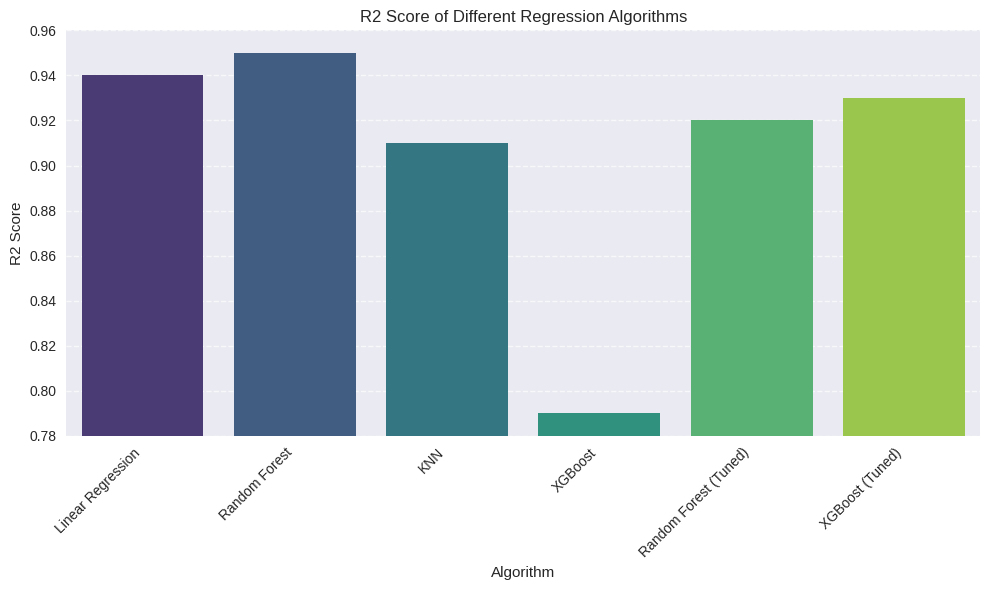

In [71]:
# Example R2 scores for different algorithms
algorithms = ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost',
              'Random Forest (Tuned)', 'XGBoost (Tuned)']
r2_scores = [0.94, 0.95, 0.91, 0.79, 0.92, 0.93]
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=r2_scores, palette='viridis')
plt.title('R2 Score of Different Regression Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.ylim(0.78, 0.96)  # Adjusted ylim to focus on the differences
plt.yticks([i/100 for i in range(78, 97, 2)])  # Increase precision of y-axis ticks
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better differentiation
plt.tight_layout()
plt.show()